In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import seaborne as sns

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [ ]:
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv', header=0,squeeze=True)
df.head(3)
#df.plot()
#pyplot.show()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0


In [ ]:
df['date'] = df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-1-1
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-1-1
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-1-1
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-1-1
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-1-1


In [ ]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir', 'date'],
      dtype='object')

In [ ]:
col = list(df.columns[:len(df.columns)-1])
col

['No',
 'year',
 'month',
 'day',
 'hour',
 'pm2.5',
 'DEWP',
 'TEMP',
 'PRES',
 'cbwd',
 'Iws',
 'Is',
 'Ir']

In [ ]:
dfnew = df[col].dropna()

In [ ]:
dfnew.head(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


In [ ]:
#dfnew.loc[:, dfnew.columns.any(['date','cbwd'])]
dfnew[dfnew.columns[~dfnew.columns.isin(['date','cbwd','No'])]]

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1
28,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2
...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0


In [ ]:
#df = df.loc[:, df.columns != 'col3']
#dfnnew
#ax = sns.heatmap(dfnew[dfnew.columns[~dfnew.columns.isin(['date','cbwd','No','month','year','day','pm2.5'])]])

In [ ]:
## Most of recirds are 0 so this column doesnt add much 
dfnew['Is'].value_counts()

0     41389
1        66
2        46
3        37
4        31
5        27
6        25
7        21
8        20
9        15
10       14
11       10
12        7
13        7
14        6
15        5
16        5
17        5
18        4
19        4
20        3
21        2
22        2
23        2
26        1
24        1
25        1
27        1
Name: Is, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='pm2.5'>

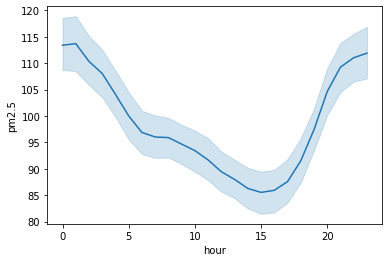

In [ ]:
sns.lineplot(data=dfnew, x="hour", y="pm2.5")

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

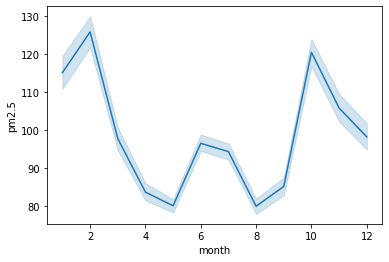

In [ ]:
sns.lineplot(data=dfnew, x="month", y="pm2.5")

<AxesSubplot:xlabel='cbwd', ylabel='pm2.5'>

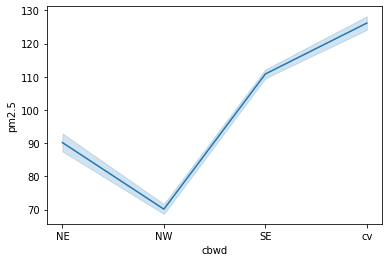

In [ ]:
sns.lineplot(data=dfnew, x="cbwd", y="pm2.5")

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

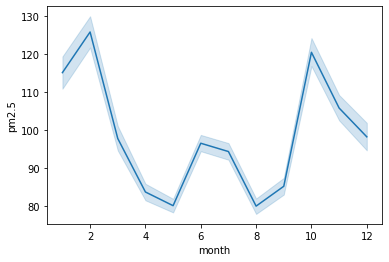

In [ ]:
sns.lineplot(data=dfnew, x="month", y="pm2.5")

<AxesSubplot:xlabel='TEMP', ylabel='pm2.5'>

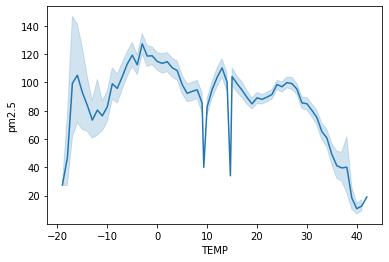

In [ ]:
sns.lineplot(data=dfnew, x="TEMP", y="pm2.5")

<AxesSubplot:xlabel='PRES', ylabel='pm2.5'>

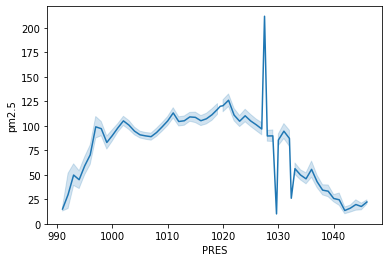

In [ ]:
sns.lineplot(data=dfnew, x="PRES", y="pm2.5")

<AxesSubplot:xlabel='Iws', ylabel='pm2.5'>

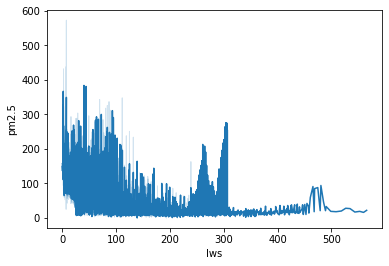

In [ ]:
sns.lineplot(data=dfnew, x="Iws", y="pm2.5")

<AxesSubplot:xlabel='cbwd', ylabel='pm2.5'>

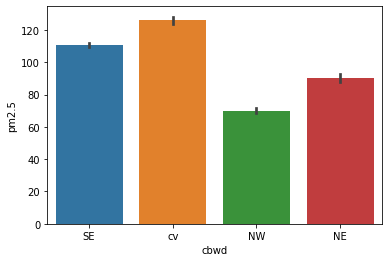

In [ ]:
 sns.barplot(x="cbwd", y="pm2.5", data=dfnew)